In [3]:
import pandas as pd

from datetime import datetime
dateparse = lambda x: datetime.strptime(x[0:10], '%Y-%m-%d')

#Read the CSV files and put them into pandas DataFrame objects
Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv', parse_dates=['datetime'], date_parser=dateparse)
Tesla:pd.DataFrame = pd.read_csv('./datasets/tesla.csv', parse_dates=['date'], date_parser=dateparse)
Dogecoin:pd.DataFrame = pd.read_csv('./datasets/dogecoin.csv', parse_dates=['date'], date_parser=dateparse)

C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_12360\2570140147.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv', parse_dates=['datetime'], date_parser=dateparse)
C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_12360\2570140147.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Tesla:pd.DataFrame = pd.read_csv('./datasets/tesla.csv', parse_dates=['date'], date_parser=dateparse)
C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_12360\2570140147.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and the

In [4]:
def get_density(df:pd.DataFrame, date_key:str):
    start_date = min(df[date_key]).replace(hour=0, minute=0, second=0, microsecond=0)
    end_date = max(df[date_key]).replace(hour=0, minute=0, second=0, microsecond=0) + pd.Timedelta(days=1)

    all_dates = pd.DataFrame({'date': pd.date_range(start_date, end_date, freq='D')})
    all_dates['exists'] = all_dates['date'].isin(df[date_key]).astype(int)

    return all_dates

In [5]:
Posts_density = get_density(Posts, "datetime")
Tesla_density = get_density(Tesla, "date")
Dogecoin_density = get_density(Dogecoin, "date")

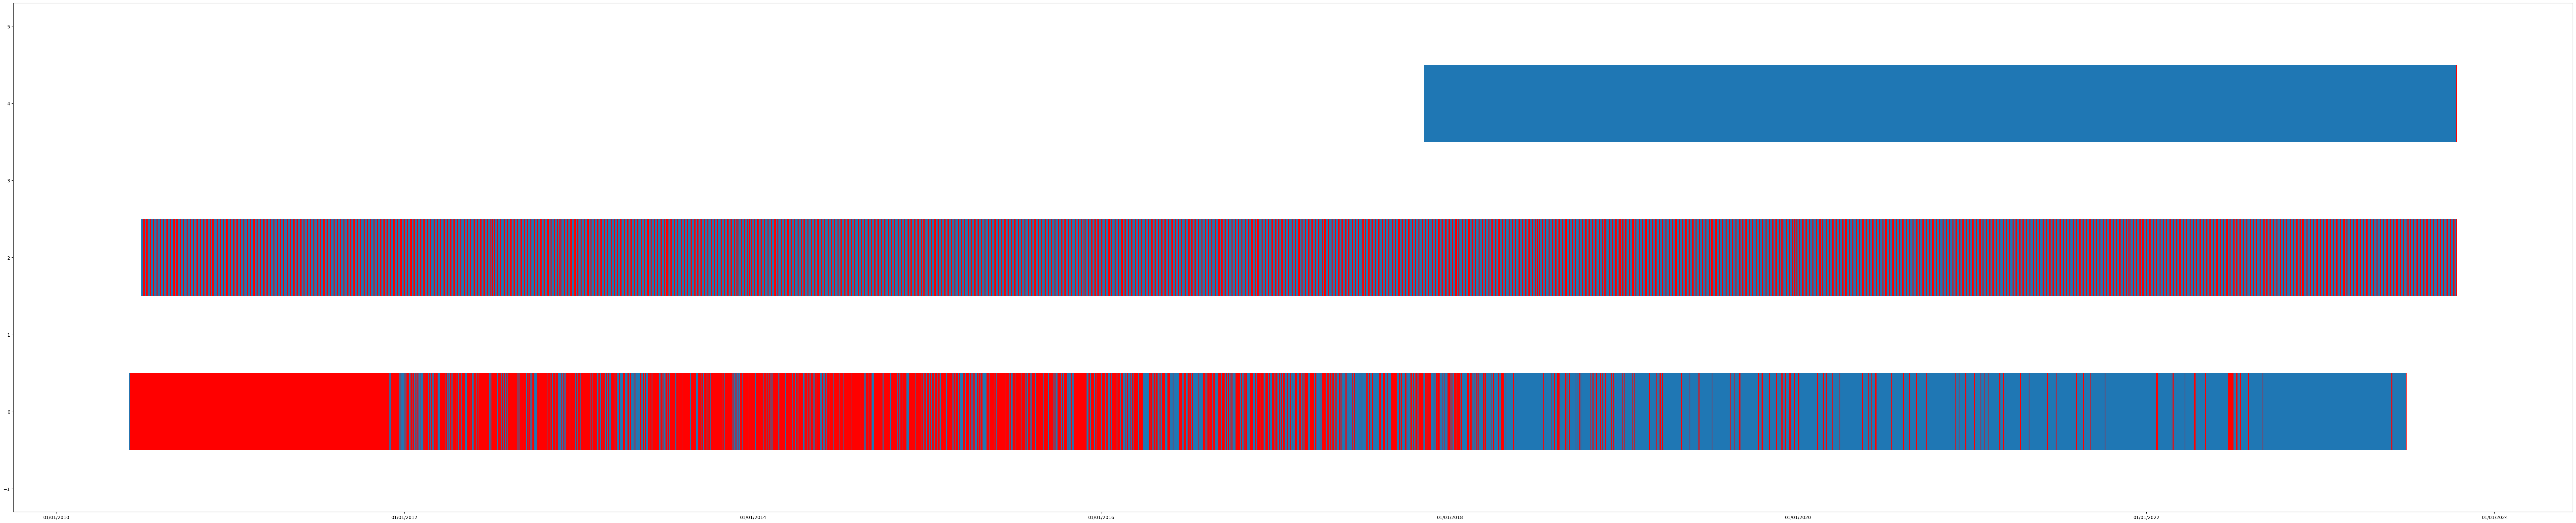

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(100,20))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))

plt.eventplot(Posts_density.loc[Posts_density['exists'] == 1, 'date'], lineoffsets=0)
plt.eventplot(Posts_density.loc[Posts_density['exists'] == 0, 'date'], lineoffsets=0, colors=['red'])

plt.eventplot(Tesla_density.loc[Tesla_density['exists'] == 1, 'date'], lineoffsets=2)
plt.eventplot(Tesla_density.loc[Tesla_density['exists'] == 0, 'date'], lineoffsets=2, colors=['red'])

plt.eventplot(Dogecoin_density.loc[Dogecoin_density['exists'] == 1, 'date'], lineoffsets=4)
plt.eventplot(Dogecoin_density.loc[Dogecoin_density['exists'] == 0, 'date'], lineoffsets=4, colors=['red'])

<BarContainer object of 3 artists>

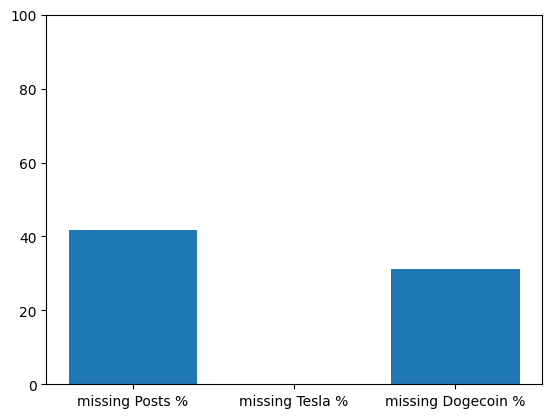

In [7]:
import matplotlib.pyplot as plt
plt.ylim(0, 100)

plt.bar(
    ["missing Posts %", "missing Tesla %", "missing Dogecoin %"], 
    [
        (Posts_density['exists'].value_counts(normalize=True) * 100).get(0, 0),
        (Dogecoin_density['exists'].value_counts(normalize=True) * 100).get(0, 0),
        (Tesla_density['exists'].value_counts(normalize=True) * 100).get(0, 0)
     
    ]
)